In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.utils import shuffle
import seaborn as sns 

In [4]:
cardio = pd.read_csv('данные для обучения.csv', sep = ',')
cardio.loc[cardio['Диагноз'] != 0, 'Диагноз'] = 1

In [267]:
'''''
cardio["Среднее R-R расстояние"] = cardio["Среднее R-R расстояние"]/360
cardio['ЧСС'] = 60/cardio['Среднее R-R расстояние']
cardio['ЧСС'] = cardio['ЧСС'].round()

In [5]:
cardio.drop(['Unnamed: 0','Среднее R-R расстояние','1 по вкладу частота'],axis=1,inplace=True)

In [344]:
''''
cardio['Средняя длительность QRS'] = cardio['Средняя длительность QRS']/360
cardio['Средняя R - амплитуда'] = cardio['Средняя R - амплитуда']/275
cardio['Средняя Q-амплитуда'] = cardio['Средняя Q-амплитуда']/275
cardio['Средняя S-амплитуда'] = cardio['Средняя S-амплитуда']/275
cardio['Амплитуда 1 по вкладу частоты'] = cardio['Амплитуда 1 по вкладу частоты']/275
cardio['Амплитуда 2 по вкладу частоты'] = cardio['Амплитуда 2 по вкладу частоты']/275
cardio['Амплитуда 3 по вкладу частоты'] = cardio['Амплитуда 3 по вкладу частоты']/275
cardio['Амплитуда 4 по вкладу частоты'] = cardio['Амплитуда 4 по вкладу частоты']/275
cardio['Амплитуда 5 по вкладу частоты'] = cardio['Амплитуда 5 по вкладу частоты']/275

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-344-39c8bda815f5>, line 10)

Тут работа с признаками произошла

In [65]:
qwe = ['ЧСС','Среднее R-R расстояние','Средняя длительность QRS','Средняя R - амплитуда','Средняя Q-амплитуда','Средняя S-амплитуда',
       'Амплитуда 1 по вкладу частоты','3 std от среднего R-R расстояния']

[Text(0, 0.5, 'ЧСС'),
 Text(0, 1.5, 'Среднее R-R расстояние'),
 Text(0, 2.5, 'Средняя длительность QRS'),
 Text(0, 3.5, 'Средняя R - амплитуда'),
 Text(0, 4.5, 'Средняя Q-амплитуда'),
 Text(0, 5.5, 'Средняя S-амплитуда'),
 Text(0, 6.5, 'Амплитуда 1 по вкладу частоты'),
 Text(0, 7.5, '3 std от среднего R-R расстояния')]

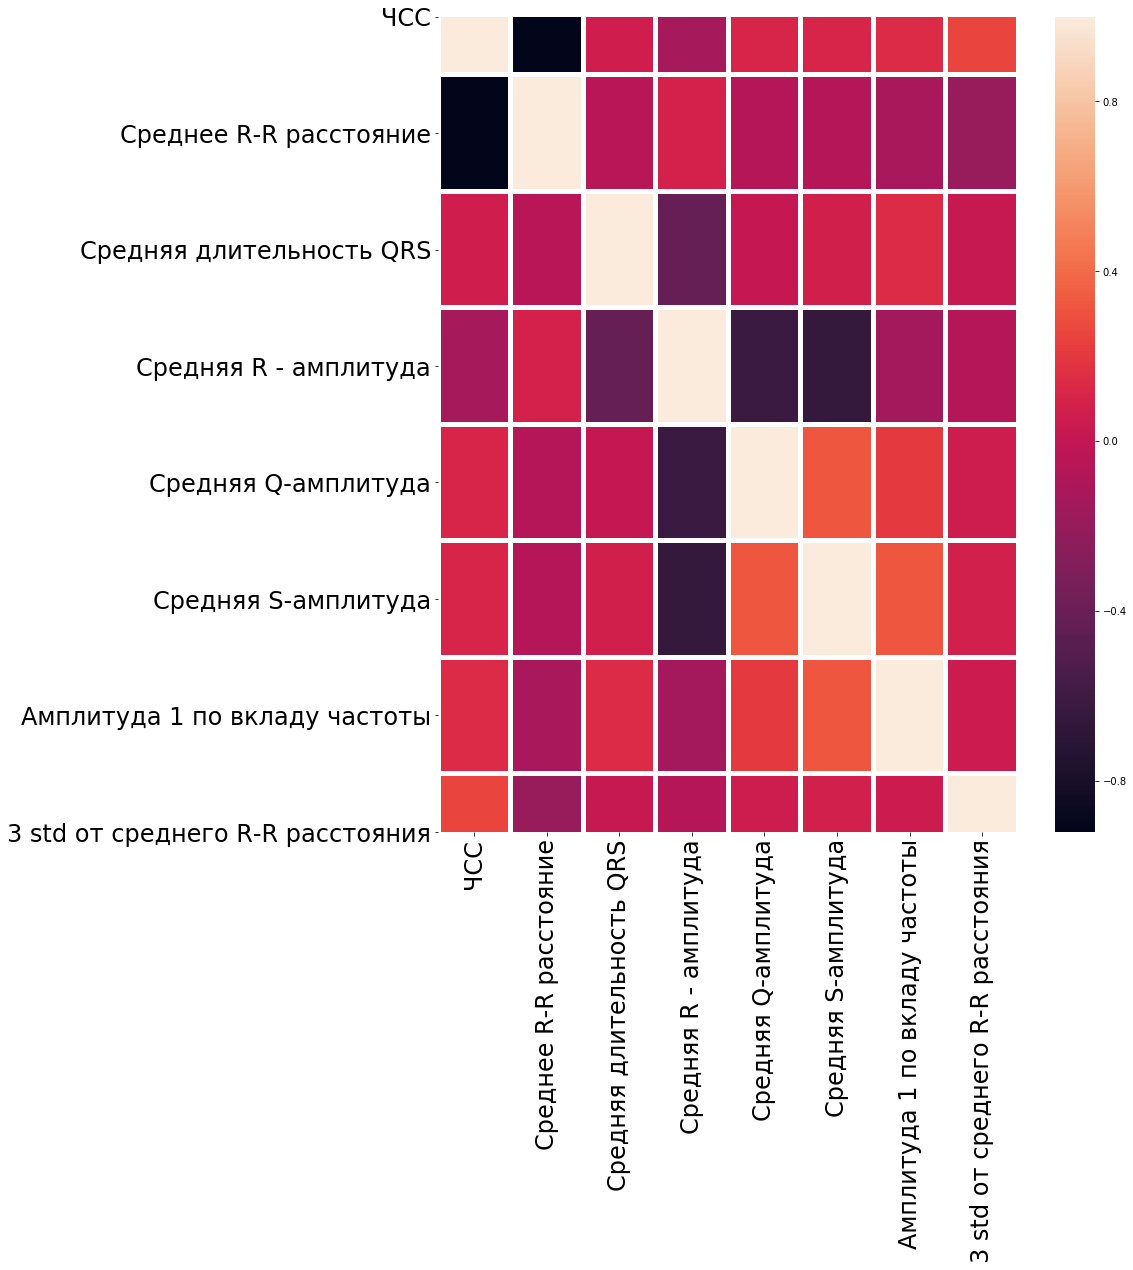

In [91]:
plt.figure(figsize=(13,15))
ax = sns.heatmap(cardio[qwe].corr(),linewidths=4);
ax.set_xticklabels(labels = qwe,fontsize = 24)
ax.set_yticklabels(labels = qwe,fontsize = 24)

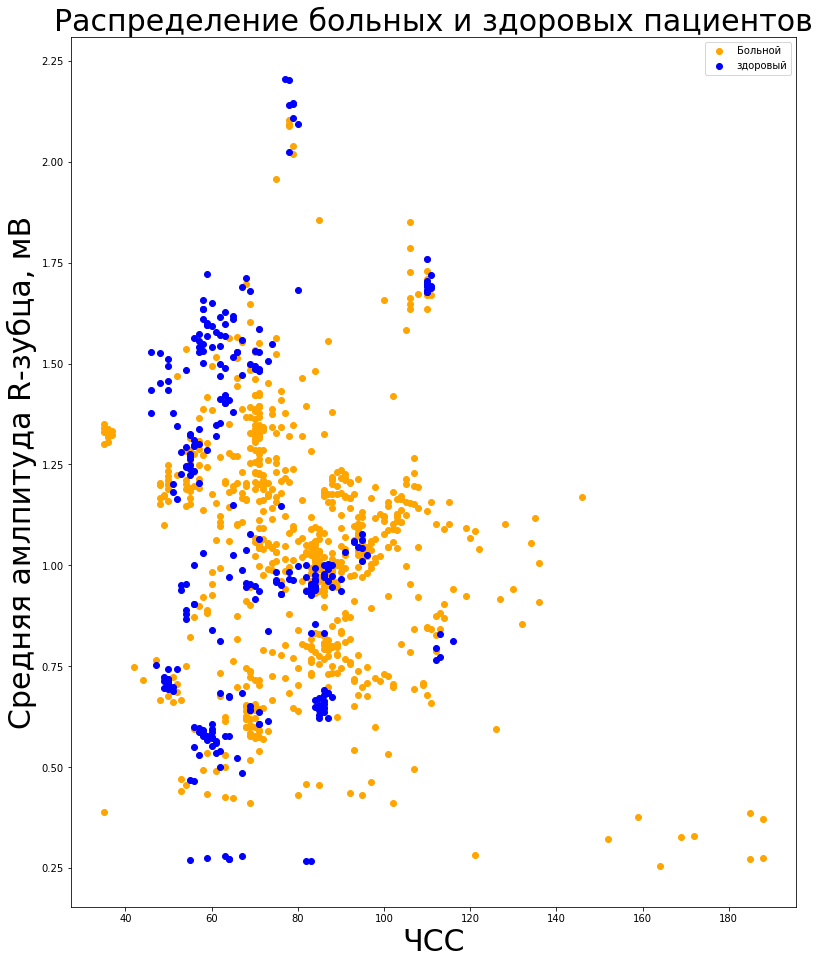

In [152]:
plt.figure(figsize=(13,16))
ax = plt.scatter(cardio[cardio['Диагноз'] == 1]['ЧСС'],cardio[cardio['Диагноз'] == 1]['Средняя R - амплитуда'],color = 'orange',label='Больной')
ax = plt.scatter(cardio[cardio['Диагноз'] == 0]['ЧСС'],cardio[cardio['Диагноз'] == 0]['Средняя R - амплитуда'],color = 'blue',label='здоровый')
plt.xlabel('ЧСС',fontsize=30)
plt.ylabel('Средняя амлпитуда R-зубца, мВ',fontsize=30)
plt.title('Распределение больных и здоровых пациентов',fontsize=30)
plt.legend()
plt.show()

Тут она кончилась

In [6]:
cardio = shuffle(cardio)

In [7]:
y = cardio['Диагноз']
x = cardio.drop('Диагноз',axis =1 )
split = int(0.7 * cardio.shape[0])
X_train, X_holdout, y_train, y_holdout = x[:split], x[split:], y[:split], y[split:]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [7]:
first_tree = DecisionTreeClassifier(random_state=17)

In [8]:
first_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [9]:
tree_pred = first_tree.predict(X_holdout)

In [12]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_holdout, tree_pred)

0.8633333333333333

In [8]:
from sklearn.model_selection import GridSearchCV

In [33]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1],'min_samples_leaf':np.arange(1,50),}
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [34]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 27.5 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1

In [49]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.8385067022369947

In [35]:
tree_grid.best_score_, tree_grid.best_params_

(0.8642857142857143,
 {'max_depth': 6, 'max_features': 0.7, 'min_samples_leaf': 6})

In [40]:
tree_grid_pred = tree_grid.predict(X_holdout)
accuracy_score(y_holdout,tree_grid_pred)

0.88

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
first_knn = KNeighborsClassifier()
first_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
first_knn_pred = first_knn.predict(X_holdout)
accuracy_score(y_holdout,first_knn_pred)

0.9066666666666666

In [83]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.895712099013798

In [14]:
knn_params = {'n_neighbors': range(1, 100)}

In [15]:
knn_grid = GridSearchCV(first_knn, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [16]:
%%time
knn_grid.fit(X_train, y_train);

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s


Wall time: 4.16 s


[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=True)

In [17]:
knn_grid.best_score_, knn_grid.best_params_

(0.9014285714285715, {'n_neighbors': 1})

In [18]:
knn_grid_predict = knn_grid.predict(X_holdout)

In [19]:
accuracy_score(y_holdout, knn_grid_predict)

0.9166666666666666

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [93]:
first_forest = RandomForestClassifier(random_state=17, n_jobs=-1, oob_score = True)

In [94]:
first_forest.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=17, verbose=0,
                       warm_start=False)

In [95]:
first_forest_pred = first_forest.predict(X_holdout)

In [96]:
accuracy_score(y_holdout,first_forest_pred)

0.91

In [98]:
np.mean(cross_val_score(first_forest, X_train, y_train, cv=5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

0.8756916898092468

In [144]:
forest_params = {'max_depth': range(1,11),
               'max_features': range(4,19),}'n_estimators':range(5,100,5)}

locally_best_forest = GridSearchCV (first_forest, forest_params,cv = 5, n_jobs=-1)
locally_best_forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [100]:
locally_best_forest.best_params_, round(locally_best_forest.best_score_, 3)

({'max_depth': 9, 'max_features': 14, 'n_estimators': 65}, 0.906)

In [101]:
tuned_forest_pred = locally_best_forest.predict(X_holdout)

In [102]:
accuracy_score(y_holdout, tuned_forest_pred)

0.9233333333333333

In [103]:
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [104]:
logit = LogisticRegression (C = 1, random_state = 17)
logit.fit(X_train, y_train)
#valid_pred = logit.predict_proba(X_holdout)[:, 1]
valid_pred = logit.predict(X_holdout)
accuracy_score(y_holdout,valid_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7766666666666666

In [106]:
lr = LogisticRegression(random_state=5, class_weight= 'balanced')
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [107]:
lr_luche = GridSearchCV(lr , parameters, cv = skf , n_jobs= -1)
lr_luche.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=5, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
lr_luche.best_params_

{'C': 1}

In [109]:
round(lr_luche.best_score_, 3)

0.731

In [110]:
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.6914425663116923

In [111]:
lr_pred = lr_luche.predict(X_holdout)
accuracy_score(y_holdout,lr_pred)

0.7633333333333333

In [28]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf = clf.fit(X_train,y_train)

In [29]:
Pred = clf.predict(X_holdout)

In [30]:
accuracy_score(y_holdout,Pred)

0.8066666666666666

In [118]:
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10),"gamma":(0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [119]:
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

0.7700361534480622

In [120]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
clf_luche = GridSearchCV(clf , parameters, cv = skf , n_jobs= -1)
clf_luche.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10),
                         'gamma': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
clf_luche.best_params_

{'C': 0.01, 'gamma': 0.0001}

In [122]:
round(clf_luche.best_score_, 3)

0.774

In [123]:
clf_pred = clf_luche.predict(X_holdout)
accuracy_score(y_holdout,clf_pred)

0.8033333333333333

Рок аук метрики для моделей. потом построишь гистограмму

In [124]:
roc_auc_score(y_holdout,tree_grid_pred)

0.8203779000239176

In [22]:
roc_auc_score(y_holdout,knn_grid_predict)

0.9033362312540753

In [126]:
roc_auc_score(y_holdout,tuned_forest_pred)

0.8991270031093039

In [127]:
roc_auc_score(y_holdout,Pred)

0.7308060272662044

In [128]:
roc_auc_score(y_holdout,clf_pred)

0.7240492705094475

In [226]:
coll = ['Модель', "ROC AUC","Доля правильных ответов"]

Коунт плоты оптимизированных моделей

In [227]:
df = pd.DataFrame(columns=coll)

In [228]:
modeli = ['Дерево решений',"Метод ближайших соседей","Случайный лес","Логистическая регрессия","Метод опрных векторов"]

In [229]:
df['Модель'] = modeli

In [231]:
roc = [0.82,0.91,0.90,0.73,0.72]

In [232]:
acur = [0.88,0.88,0.90,0.80,0.80]

In [233]:
df['ROC AUC'] = roc
df['Доля правильных ответов'] = acur

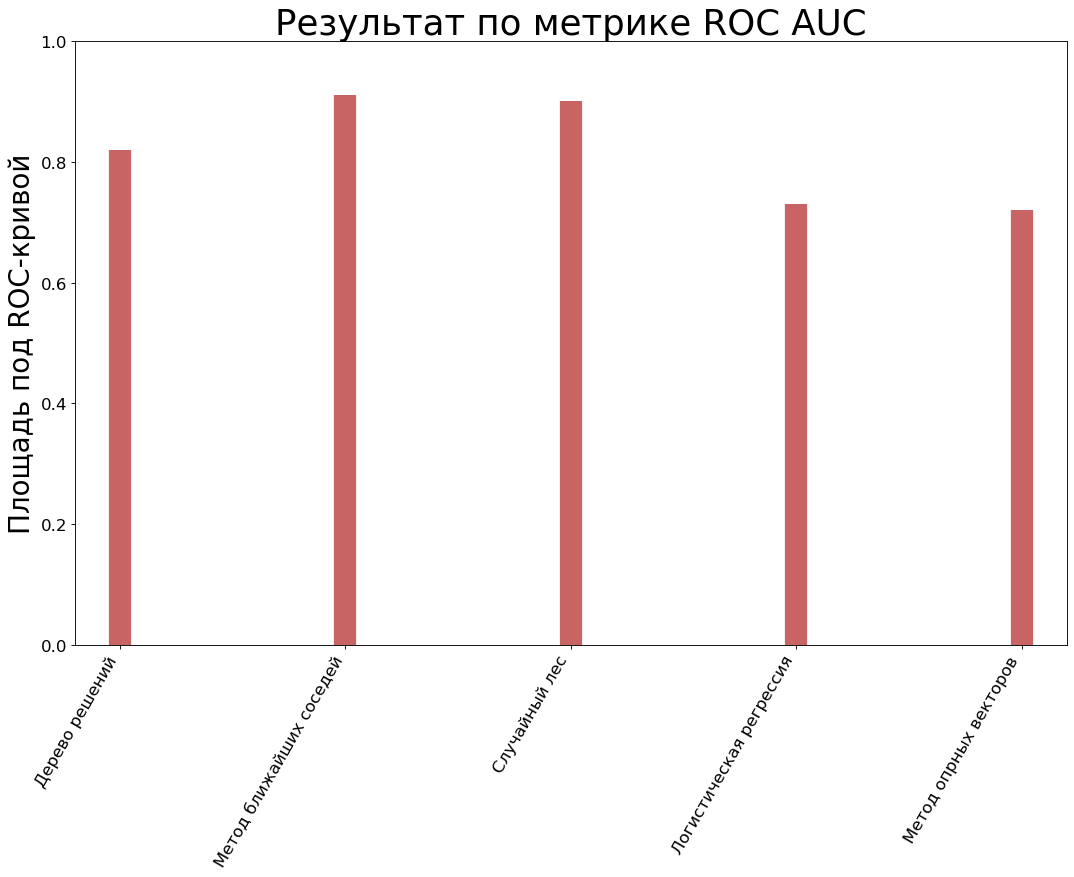

In [388]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df["Модель"], ymin=0, ymax=df['ROC AUC'], color='firebrick', alpha=0.7, linewidth=20)

# Title, Label, Ticks and Ylim
ax.set_title('Результат по метрике ROC AUC',fontsize=32) #,fontdict={'size':22})
ax.set( ylim=(0, 1))
plt.yticks(fontsize=15)
plt.ylabel('Площадь под ROC-кривой',fontsize=25)
plt.xticks(df['Модель'],rotation=60, horizontalalignment='right', fontsize=15)


plt.show()

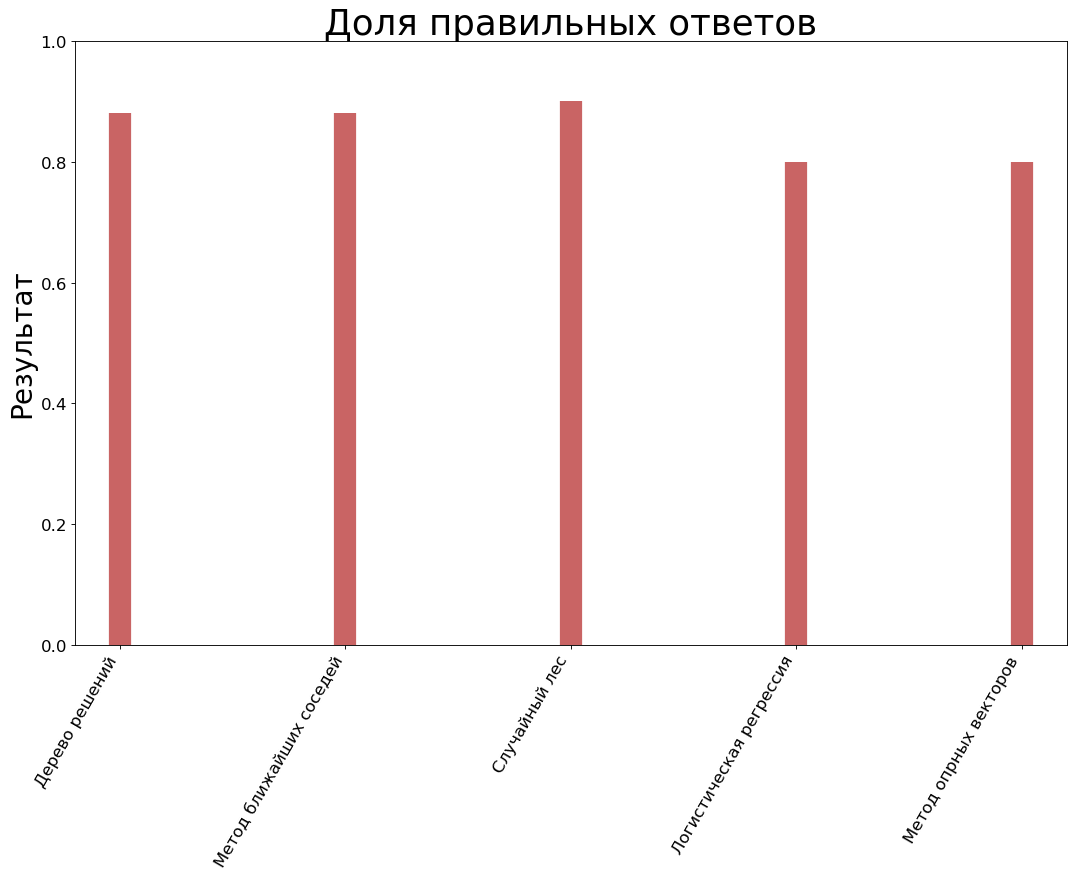

In [387]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df["Модель"], ymin=0, ymax=df['Доля правильных ответов'], color='firebrick', alpha=0.7, linewidth=20)

# Title, Label, Ticks and Ylim
ax.set_title('Доля правильных ответов',fontsize=32) #,fontdict={'size':22})
ax.set( ylim=(0, 1))
plt.yticks(fontsize=15)
plt.ylabel('Результат',fontsize=25)
plt.xticks(df['Модель'],rotation=60, horizontalalignment='right', fontsize=15)


plt.show()

Анализ КНН как лучшей модели

In [166]:
qqq = cardio.drop(['Диагноз'],axis=1)

In [202]:
qqq.columns[26]

'Амплитуда 3 по вкладу частоты'

In [177]:
importances = first_forest.feature_importances_

In [204]:
importances = [importances[28],importances[2],importances[1],importances[4],importances[0],importances[25],importances[20],
               importances[27],importances[3],importances[26]]

In [216]:
np.array(importances)[indices[:num_to_plot]]

array([0.1415926 , 0.09596304, 0.09282323, 0.08001005, 0.07750157,
       0.07494988, 0.06325594, 0.05873439, 0.05658143, 0.0538823 ])

Матрица ошибок для КНН и его харктеристики.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
import itertools

In [25]:
y_holdout.value_counts()

1    214
0     86
Name: Диагноз, dtype: int64

Confusion matrix, without normalization
[[ 75  11]
 [ 14 200]]


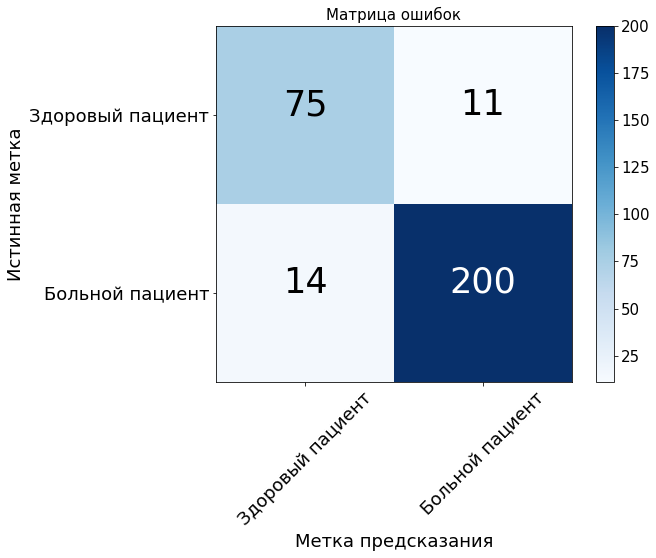

In [50]:
cnf_matrix = confusion_matrix(y_holdout, knn_grid_predict)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize = 15)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize = 18)
    plt.yticks(tick_marks, classes,fontsize = 18)
    plt.colorbar()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize = 35)

    plt.ylabel('Истинная метка',fontsize = 18)
    plt.xlabel('Метка предсказания',fontsize = 18)
    plt.tight_layout()

font = {'size' : 15}

plt.rc('font', **font)

plt.figure(figsize=(10,8 ))
plot_confusion_matrix(cnf_matrix, classes=['Здоровый пациент', 'Больной пациент'],
                      title='Матрица ошибок')
plt.show()

Кривые валидации и обучения

In [52]:
from sklearn.metrics import precision_recall_curve, classification_report

In [53]:
report = classification_report(y_holdout, knn_grid_predict, target_names=['Здоровый пациент', 'Больной пациент'])
print(report)


                  precision    recall  f1-score   support

Здоровый пациент       0.84      0.87      0.86        86
 Больной пациент       0.95      0.93      0.94       214

        accuracy                           0.92       300
       macro avg       0.90      0.90      0.90       300
    weighted avg       0.92      0.92      0.92       300

